# Resim Siniflandirilmasi

In [1]:
from google.colab import drive
drive.mount('/content/my_drive')

Mounted at /content/my_drive


In [2]:
%cd /content/my_drive/MyDrive/datasets/mantarlar_lite

/content/my_drive/MyDrive/datasets/mantarlar_lite


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from PIL import Image

In [ ]:
mantar1=Image.open("./egitim/yenilebilir/ce (1).jpg")

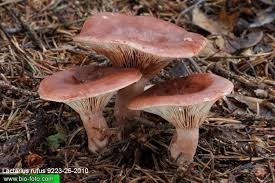

In [ ]:
mantar1

In [ ]:
mantar1.size

(275, 183)

In [ ]:
mantar2=Image.open("./egitim/yenilebilir/ce (108).jpg")

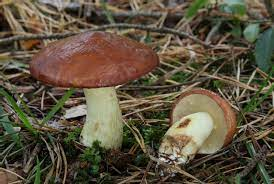

In [ ]:
mantar2

In [ ]:
mantar2.size

(274, 184)

##Resimlerin Standardize Edilmesi

In [ ]:
from torchvision import transforms

In [ ]:
resim_donusturucu=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.2)
])

RandomHorizontalFlip bir data augmentation methodudur. Bundan başka torch'ta çok farkli data aug methodlari vardir, genel adata aug elimizdeki verileri rastgele bozar/farklilastirir.

In [ ]:
mantar1_don=resim_donusturucu(mantar1)

In [ ]:
mantar1_don

tensor([[[0.2157, 0.4196, 0.4824,  ..., 0.3882, 0.2667, 0.2510],
         [0.1804, 0.3647, 0.5255,  ..., 0.4314, 0.3451, 0.2824],
         [0.4431, 0.5294, 0.4863,  ..., 0.3490, 0.3647, 0.3255],
         ...,
         [0.0196, 0.1490, 0.5333,  ..., 0.3804, 0.3804, 0.5373],
         [0.0196, 0.0667, 0.2863,  ..., 0.3608, 0.2863, 0.4745],
         [0.0078, 0.0078, 0.0039,  ..., 0.2745, 0.2902, 0.4353]],

        [[0.1686, 0.3686, 0.4235,  ..., 0.3490, 0.2431, 0.2431],
         [0.1294, 0.3098, 0.4627,  ..., 0.3922, 0.3176, 0.2706],
         [0.3922, 0.4745, 0.4235,  ..., 0.3059, 0.3373, 0.3098],
         ...,
         [0.0314, 0.1686, 0.5647,  ..., 0.3098, 0.3059, 0.4392],
         [0.0353, 0.0863, 0.3137,  ..., 0.2863, 0.2078, 0.3725],
         [0.0196, 0.0275, 0.0353,  ..., 0.2039, 0.2078, 0.3294]],

        [[0.1294, 0.3255, 0.3804,  ..., 0.2941, 0.2039, 0.2431],
         [0.0902, 0.2706, 0.4235,  ..., 0.3490, 0.2824, 0.2667],
         [0.3451, 0.4314, 0.3804,  ..., 0.2824, 0.3137, 0.

In [ ]:
mantar1_don.shape

torch.Size([3, 128, 128])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

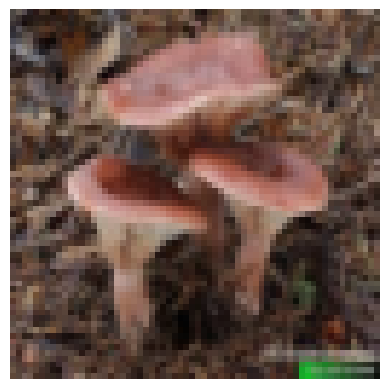

In [ ]:
plt.imshow(mantar1_don.permute(1,2,0))
plt.axis("off")

##Siniflarin Olusturulmasi

In [10]:
from torchvision.datasets import ImageFolder

In [ ]:
egitim_veri=ImageFolder(root='./egitim',transform=resim_donusturucu)

In [ ]:
egitim_veri

Dataset ImageFolder
    Number of datapoints: 520
    Root location: ./egitim
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               RandomHorizontalFlip(p=0.2)
           )

In [ ]:
egitim_veri.class_to_idx

{'yenilebilir': 0, 'zehirli': 1}

In [ ]:
resim_donusturucu_test=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
test_veri=ImageFolder(root='./test',transform=resim_donusturucu_test)

#Resimlerin Batchlere (küçük lokmalara) Ayrılması

In [9]:
from torch.utils.data import DataLoader

In [ ]:
egitim_veri_lokmalar=DataLoader(egitim_veri,batch_size=16,shuffle=True)
#batch_size kucultebilir

In [ ]:
test_veri_lokmalar=DataLoader(test_veri,batch_size=16)

In [ ]:
ilk_lokma=next(iter(egitim_veri_lokmalar))

In [ ]:
ilk_lokma[1]

tensor([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
ilk_lokma[0][0]


tensor([[[0.5098, 0.3961, 0.3412,  ..., 0.5804, 0.5059, 0.5333],
         [0.5490, 0.4353, 0.3608,  ..., 0.5922, 0.5020, 0.4353],
         [0.5725, 0.4745, 0.3882,  ..., 0.5647, 0.5255, 0.4039],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 1.0000]],

        [[0.5804, 0.4667, 0.4078,  ..., 0.5922, 0.5490, 0.6039],
         [0.6078, 0.4941, 0.4196,  ..., 0.5922, 0.5373, 0.5020],
         [0.6196, 0.5255, 0.4392,  ..., 0.5569, 0.5451, 0.4667],
         ...,
         [0.9961, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 1.0000]],

        [[0.2588, 0.1451, 0.0941,  ..., 0.3961, 0.2863, 0.2392],
         [0.2941, 0.1804, 0.1137,  ..., 0.3922, 0.2745, 0.1412],
         [0.3137, 0.2196, 0.1412,  ..., 0.3451, 0.2745, 0.

In [ ]:
ilk_lokma[0][0].shape

torch.Size([3, 128, 128])

In [ ]:
3*128*128

49152

##Model Oluşturma

In [ ]:
class MantarSiniflandir1(nn.Module):
  def __init__(self):
    super().__init__()
    self.duzlestirici=nn.Flatten()
    self.katman1=nn.Linear(3*64*64,10000)
    self.katman2=nn.Linear(10000,100)
    self.katman3=nn.Linear(100,1)
    self.relu=nn.ReLU()
    self.dropout=nn.Dropout(0.1)

  def forward(self,x):
    x=self.duzlestirici(x)
    x=self.dropout(self.relu(self.katman1(x)))
    x=self.dropout(self.relu(self.katman2(x)))
    x=self.katman3(x)
    return x


In [ ]:
class MantarSiniflandir2(nn.Module):
  def __init__(self):
    super().__init__()
    self.duzlestirici=nn.Flatten()
    self.katman1=nn.Linear(3*64*64,10000)
    self.katman2=nn.Linear(10000,1)
    self.relu=nn.ReLU()
    self.dropout=nn.Dropout(0.1)

  def forward(self,x):
    x=self.duzlestirici(x)
    x=self.dropout(self.relu(self.katman1(x)))
    x=self.katman2(x)
    return x

In [ ]:
torch.manual_seed(42)
model=MantarSiniflandir2()

In [12]:
device="cuda"

In [ ]:
model.to(device)

MantarSiniflandir2(
  (duzlestirici): Flatten(start_dim=1, end_dim=-1)
  (katman1): Linear(in_features=12288, out_features=10000, bias=True)
  (katman2): Linear(in_features=10000, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
3*64*64*10000+10000+1000*100+100+2

122990102

In [ ]:
t=0
for p in model.parameters():
  t+=p.numel()
print(t)

123890201


In [8]:
kayip_fonk=nn.BCEWithLogitsLoss()

In [ ]:
optimizer=optim.Adam(model.parameters(),lr=0.0001)

In [18]:
from tqdm import tqdm

In [ ]:
for e in tqdm(range(10)):
  model.train()
  egitim_kayip_toplam=0

  for X,y in egitim_veri_lokmalar:
    egitim_tahmin=model(X.to(device))
    egitim_kayip=kayip_fonk(egitim_tahmin,y.to(device).unsqueeze(1).float())
    egitim_kayip_toplam+=egitim_kayip.item()

    egitim_kayip.backward()
    optimizer.step()
    optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    test_kayip_toplam=0
    for X,y in test_veri_lokmalar:
      test_tahmin=model(X.to(device))
      test_kayip=kayip_fonk(test_tahmin,y.to(device).unsqueeze(1).float())
      test_kayip_toplam+=test_kayip.item()
  print(f'Epoch: {e+1} | Egitim Kayip: {egitim_kayip_toplam:.3f} | Test Kayip: {test_kayip_toplam:.3f}')


 10%|█         | 1/10 [07:23<1:06:28, 443.15s/it]

Epoch: 1 | Egitim Kayip: 31.231 | Test Kayip: 9.301


 20%|██        | 2/10 [07:26<24:36, 184.52s/it]  

Epoch: 2 | Egitim Kayip: 22.374 | Test Kayip: 8.860


 30%|███       | 3/10 [07:30<11:52, 101.82s/it]

Epoch: 3 | Egitim Kayip: 21.851 | Test Kayip: 8.965


 40%|████      | 4/10 [07:33<06:17, 62.94s/it] 

Epoch: 4 | Egitim Kayip: 21.499 | Test Kayip: 9.472


 50%|█████     | 5/10 [07:36<03:27, 41.52s/it]

Epoch: 5 | Egitim Kayip: 20.638 | Test Kayip: 9.368


 60%|██████    | 6/10 [07:40<01:54, 28.61s/it]

Epoch: 6 | Egitim Kayip: 20.916 | Test Kayip: 8.966


 70%|███████   | 7/10 [07:43<01:01, 20.37s/it]

Epoch: 7 | Egitim Kayip: 20.023 | Test Kayip: 8.746


 80%|████████  | 8/10 [07:47<00:29, 14.93s/it]

Epoch: 8 | Egitim Kayip: 19.369 | Test Kayip: 10.371


 90%|█████████ | 9/10 [07:50<00:11, 11.36s/it]

Epoch: 9 | Egitim Kayip: 21.733 | Test Kayip: 9.521


100%|██████████| 10/10 [07:54<00:00, 47.40s/it]

Epoch: 10 | Egitim Kayip: 18.884 | Test Kayip: 9.365


In [ ]:
model.eval()
y_gercekler=[]
y_tahminler=[]
with torch.no_grad():
  for X,y in tqdm(test_veri_lokmalar):
        test_tahmin=model(X.to(device))
        y_tahminler.extend((torch.sigmoid(test_tahmin)>=0.5).cpu().long())
        y_gercekler.extend(y)

100%|██████████| 13/13 [00:01<00:00, 11.93it/s]


In [ ]:
tahminler=[y[0].item() for y in y_tahminler]

In [ ]:
gercekler=[y.item() for y in y_gercekler]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(gercekler,tahminler)

0.715

CNN

In [ ]:
class IlkCNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.katman1=nn.Sequential(nn.Conv2d(3,20,kernel_size=3,padding=1),nn.ReLU(),nn.MaxPool2d(2)) #20 tane 32*32 resim
    self.katman2=nn.Sequential(nn.Conv2d(20,5,kernel_size=3,padding=1),nn.ReLU(),nn.MaxPool2d(2)) #5 tane 16*16 resim
    self.duzlestirici=nn.Flatten()
    self.siniflandirici=nn.Linear(5*16*16,1)
  def forward(self,x):
    x=self.katman1(x)
    x=self.katman2(x)
    x=self.duzlestirici(x)
    x=self.siniflandirici(x)
    return x

In [ ]:
torch.manual_seed(42)
model=IlkCNNModel()

In [ ]:
model.to(device)

IlkCNNModel(
  (katman1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (katman2): Sequential(
    (0): Conv2d(20, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (duzlestirici): Flatten(start_dim=1, end_dim=-1)
  (siniflandirici): Linear(in_features=1280, out_features=1, bias=True)
)

In [ ]:
optimizer=optim.Adam(model.parameters(),lr=0.0001)

In [ ]:
for e in tqdm(range(10)):
  model.train()
  egitim_kayip_toplam=0

  for X,y in egitim_veri_lokmalar:
    egitim_tahmin=model(X.to(device))
    egitim_kayip=kayip_fonk(egitim_tahmin,y.to(device).unsqueeze(1).float())
    egitim_kayip_toplam+=egitim_kayip.item()

    egitim_kayip.backward()
    optimizer.step()
    optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    test_kayip_toplam=0
    for X,y in test_veri_lokmalar:
      test_tahmin=model(X.to(device))
      test_kayip=kayip_fonk(test_tahmin,y.to(device).unsqueeze(1).float())
      test_kayip_toplam+=test_kayip.item()
  print(f'Epoch: {e+1} | Egitim Kayip: {egitim_kayip_toplam:.3f} | Test Kayip: {test_kayip_toplam:.3f}')


 10%|█         | 1/10 [00:04<00:40,  4.44s/it]

Epoch: 1 | Egitim Kayip: 22.874 | Test Kayip: 8.992


 20%|██        | 2/10 [00:07<00:30,  3.77s/it]

Epoch: 2 | Egitim Kayip: 22.842 | Test Kayip: 8.984


 30%|███       | 3/10 [00:11<00:25,  3.60s/it]

Epoch: 3 | Egitim Kayip: 22.815 | Test Kayip: 8.979


 40%|████      | 4/10 [00:14<00:20,  3.45s/it]

Epoch: 4 | Egitim Kayip: 22.788 | Test Kayip: 8.971


 50%|█████     | 5/10 [00:17<00:17,  3.46s/it]

Epoch: 5 | Egitim Kayip: 22.763 | Test Kayip: 8.961


 60%|██████    | 6/10 [00:21<00:13,  3.38s/it]

Epoch: 6 | Egitim Kayip: 22.688 | Test Kayip: 8.948


 70%|███████   | 7/10 [00:24<00:10,  3.39s/it]

Epoch: 7 | Egitim Kayip: 22.632 | Test Kayip: 8.932


 80%|████████  | 8/10 [00:27<00:06,  3.36s/it]

Epoch: 8 | Egitim Kayip: 22.546 | Test Kayip: 8.910


 90%|█████████ | 9/10 [00:30<00:03,  3.30s/it]

Epoch: 9 | Egitim Kayip: 22.423 | Test Kayip: 8.887


100%|██████████| 10/10 [00:34<00:00,  3.42s/it]

Epoch: 10 | Egitim Kayip: 22.309 | Test Kayip: 8.863


In [ ]:
model.eval()
y_gercekler=[]
y_tahminler=[]
with torch.no_grad():
  for X,y in tqdm(test_veri_lokmalar):
        test_tahmin=model(X.to(device))
        y_tahminler.extend((torch.sigmoid(test_tahmin)>=0.5).cpu().long())
        y_gercekler.extend(y)

100%|██████████| 13/13 [00:01<00:00, 12.03it/s]


#Hazir Model Kullanma

In [ ]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(2*2*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
torch.manual_seed(42)
model=VGG16().to(device)

In [ ]:
optimizer=optim.Adam(model.parameters(),lr=0.0001)

In [ ]:
for e in tqdm(range(10)):
  model.train()
  egitim_kayip_toplam=0

  for X,y in egitim_veri_lokmalar:
    egitim_tahmin=model(X.to(device))
    egitim_kayip=kayip_fonk(egitim_tahmin,y.to(device).unsqueeze(1).float())
    egitim_kayip_toplam+=egitim_kayip.item()

    egitim_kayip.backward()
    optimizer.step()
    optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    test_kayip_toplam=0
    for X,y in test_veri_lokmalar:
      test_tahmin=model(X.to(device))
      test_kayip=kayip_fonk(test_tahmin,y.to(device).unsqueeze(1).float())
      test_kayip_toplam+=test_kayip.item()
  print(f'Epoch: {e+1} | Egitim Kayip: {egitim_kayip_toplam:.3f} | Test Kayip: {test_kayip_toplam:.3f}')


 10%|█         | 1/10 [00:03<00:33,  3.71s/it]

Epoch: 1 | Egitim Kayip: 25.329 | Test Kayip: 8.984


 20%|██        | 2/10 [00:07<00:29,  3.63s/it]

Epoch: 2 | Egitim Kayip: 23.236 | Test Kayip: 8.616


 30%|███       | 3/10 [00:10<00:25,  3.65s/it]

Epoch: 3 | Egitim Kayip: 20.549 | Test Kayip: 8.680


 40%|████      | 4/10 [00:14<00:21,  3.66s/it]

Epoch: 4 | Egitim Kayip: 19.708 | Test Kayip: 8.865


 50%|█████     | 5/10 [00:18<00:18,  3.77s/it]

Epoch: 5 | Egitim Kayip: 19.141 | Test Kayip: 10.901


 60%|██████    | 6/10 [00:22<00:15,  3.75s/it]

Epoch: 6 | Egitim Kayip: 18.112 | Test Kayip: 8.484


 70%|███████   | 7/10 [00:26<00:11,  3.75s/it]

Epoch: 7 | Egitim Kayip: 16.141 | Test Kayip: 8.980


 80%|████████  | 8/10 [00:29<00:07,  3.72s/it]

Epoch: 8 | Egitim Kayip: 16.724 | Test Kayip: 8.910


 90%|█████████ | 9/10 [00:33<00:03,  3.65s/it]

Epoch: 9 | Egitim Kayip: 14.128 | Test Kayip: 13.875


100%|██████████| 10/10 [00:37<00:00,  3.70s/it]

Epoch: 10 | Egitim Kayip: 13.895 | Test Kayip: 8.840


#Transfer Öğrenme

In [4]:
import torchvision

In [39]:
agiriliklar=torchvision.models.DenseNet161_Weights.DEFAULT

In [6]:
donusturucu=agiriliklar.transforms()

In [11]:
egitim_veri=ImageFolder(root='./egitim',transform=donusturucu)
test_veri=ImageFolder(root='./test',transform=donusturucu)
egitim_veri_lokmalar=DataLoader(egitim_veri,batch_size=16,shuffle=True)
test_veri_lokmalar=DataLoader(test_veri,batch_size=16)

In [40]:
model=torchvision.models.densenet161(weights=agiriliklar)

In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [41]:
model.classifier=nn.Linear(2208,1)
#model.classifier=nn.Sequential(nn.Linear(2208,100),nn.ReLU(),nn.Linear(100,1))

In [42]:
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [43]:
optimizer=optim.Adam(model.parameters(),lr=0.0001)

In [44]:
for e in tqdm(range(5)):
  model.train()
  egitim_kayip_toplam=0

  for X,y in egitim_veri_lokmalar:
    egitim_tahmin=model(X.to(device))
    egitim_kayip=kayip_fonk(egitim_tahmin,y.to(device).unsqueeze(1).float())
    egitim_kayip_toplam+=egitim_kayip.item()

    egitim_kayip.backward()
    optimizer.step()
    optimizer.zero_grad()

  model.eval()
  with torch.no_grad():
    test_kayip_toplam=0
    for X,y in test_veri_lokmalar:
      test_tahmin=model(X.to(device))
      test_kayip=kayip_fonk(test_tahmin,y.to(device).unsqueeze(1).float())
      test_kayip_toplam+=test_kayip.item()
  print(f'Epoch: {e+1} | Egitim Kayip: {egitim_kayip_toplam:.3f} | Test Kayip: {test_kayip_toplam:.3f}')


 20%|██        | 1/5 [00:08<00:34,  8.51s/it]

Epoch: 1 | Egitim Kayip: 16.309 | Test Kayip: 6.645


 40%|████      | 2/5 [00:16<00:25,  8.48s/it]

Epoch: 2 | Egitim Kayip: 4.812 | Test Kayip: 5.758


 60%|██████    | 3/5 [00:25<00:16,  8.47s/it]

Epoch: 3 | Egitim Kayip: 1.562 | Test Kayip: 7.033


 80%|████████  | 4/5 [00:33<00:08,  8.46s/it]

Epoch: 4 | Egitim Kayip: 1.736 | Test Kayip: 9.963


100%|██████████| 5/5 [00:42<00:00,  8.47s/it]

Epoch: 5 | Egitim Kayip: 1.208 | Test Kayip: 7.515


In [45]:
model.eval()
y_gercekler=[]
y_tahminler=[]
with torch.no_grad():
  for X,y in tqdm(test_veri_lokmalar):
        test_tahmin=model(X.to(device))
        y_tahminler.extend((torch.sigmoid(test_tahmin)>=0.5).cpu().long())
        y_gercekler.extend(y)

100%|██████████| 13/13 [00:01<00:00,  6.72it/s]


In [46]:
tahminler=[y[0].item() for y in y_tahminler]
gercekler=[y.item() for y in y_gercekler]
from sklearn.metrics import accuracy_score
accuracy_score(gercekler,tahminler)

0.8